In [13]:
%matplotlib widget
from main import *
import sympy as sp
import matplotlib.pyplot as plt
from sympy import Heaviside, sin, cos, pi

from subcircuits.full_bridge_rectifier import full_bridge_rectifier
sp.init_printing()

In [14]:
Vin = 1 * Heaviside(t - 1) + 1 * Heaviside(t - 2) - 3 * Heaviside(t - 4) - 1 * Heaviside(t - 5)
Iout = 0.1

In [15]:
acTest = Solver.Circuit("acTest")
acTest.element(
    
            VoltageSource("Vg", {"V+" : "V1", "V-" : Gnd}, V_t = Vin),
    
            #VoltageSource("Vg", {"V+" : "V0", "V-" : Gnd}, V_t = Vin),
            #Resistor("Rg", {"V1" : "V0", "V2" : "V1"}, R = 1),
                    
            #full_bridge_rectifier("Bridge", {"Vin1" : "V1", "Vin2" : Gnd, "Vout+" : "V2", "Vout-" : "V3"}, Vd = 0.6),
            
            Diode("D1", {"Vp" : "V1", "Vn" : "V2"}, Vd = 0.6),
            Resistor("Rout", {"V1" : "V2", "V2" : Gnd}, R = 1e3),
                    
            #Capacitor("C1", {"V1" : "V2", "V2" : "V3"}, V0 = 0, C = 1e-3),
            #CurrentSource("Iout", {"V+" : "V2", "V-" : "V3"}, I_t = -Iout),
            #Resistor("Rout", {"V1" : "V2", "V2" : "V3"}, R = 1e3),
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': -Heaviside(t - 5) - 3*Heaviside(t - 4) + Heaviside(t - 2) + Heaviside(t - 1)}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}},
 'Rout': {'name': 'Rout', 'type': 'Resistor', 'nodes': {'V1': 'V2', 'V2': 0}, 'values': {'R': 1000.0}}}

In [16]:
Solver.setMain("acTest")
compiled = Solver.compile()

In [17]:
simulatorState = solveLaplace(compiled, 10, 0.1, debugLog = 1)

{I1_0, V0, V1, I2_1, I2_0, I0_0, I0_1, I1_1}
[Eq(I0_0 + I1_0, 0), Eq(I1_1 + I2_0, 0)]
{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': -Heaviside(t - 5) - 3*Heaviside(t - 4) + Heaviside(t - 2) + Heaviside(t - 1)}}, 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}}, 'Rout': {'name': 'Rout', 'type': 'Resistor', 'nodes': {'V1': 'V2', 'V2': 0}, 'values': {'R': 1000.0}}}
{'Vg': {'V+': V0, 'V-': 0}, 'D1': {'Vp': V0, 'Vn': V1}, 'Rout': {'V1': V1, 'V2': 0}}
{'Vg': {'V+': I0_0, 'V-': I0_1}, 'D1': {'Vp': I1_0, 'Vn': I1_1}, 'Rout': {'V1': I2_0, 'V2': I2_1}}
***************************************
{('D1', 'Cut')}
[Eq(V0, (exp(4*s) + exp(3*s) - 3*exp(s) - 1)*exp(-5*s)/s), Eq(I0_0 + I0_1, 0), Eq(I1_0, 0), Eq(I1_1, 0), Eq(I2_0, 0.001*V1), Eq(I2_0 + I2_1, 0), Eq(I0_0 + I1_0, 0), Eq(I1_1 + I2_0, 0)]
{('D1', 'Cut'): [V0 - V1 < 0.6]}
{V0, V1}
----------------------------------------

In [18]:
model, _ = simulatorState

print(compiled["nodes"])

Vin = compiled["voltages"]["Vg"]["V+"]
Iin = compiled["currents"]["Vg"]["V-"]
Vout = compiled["voltages"]["Rout"]["V1"] - compiled["voltages"]["Rout"]["V2"]

{'V1': V0, 'V2': V1}


In [19]:
printModel(model, var=t, measurments={Vout})

{('D1', 'Cut')}
t ∈ Interval.Ropen(0, 1.00002441406250)
V1  : 
0
-------------------------------------
{('D1', 'Fwd')}
t ∈ Interval.Ropen(1.00002441406250, 4.00000000000000)
V1  : 
2⋅U(t)    ⎛    163839⎞      ⎛    122879⎞    ⎛    40959⎞
────── - U⎜t - ──────⎟ - 3⋅U⎜t - ──────⎟ + U⎜t - ─────⎟
  5       ⎝    40960 ⎠      ⎝    40960 ⎠    ⎝    40960⎠
-------------------------------------
{('D1', 'Cut')}
t ∈ Interval(4.00000000000000, 10.1000000000000)
V1  : 
0
-------------------------------------


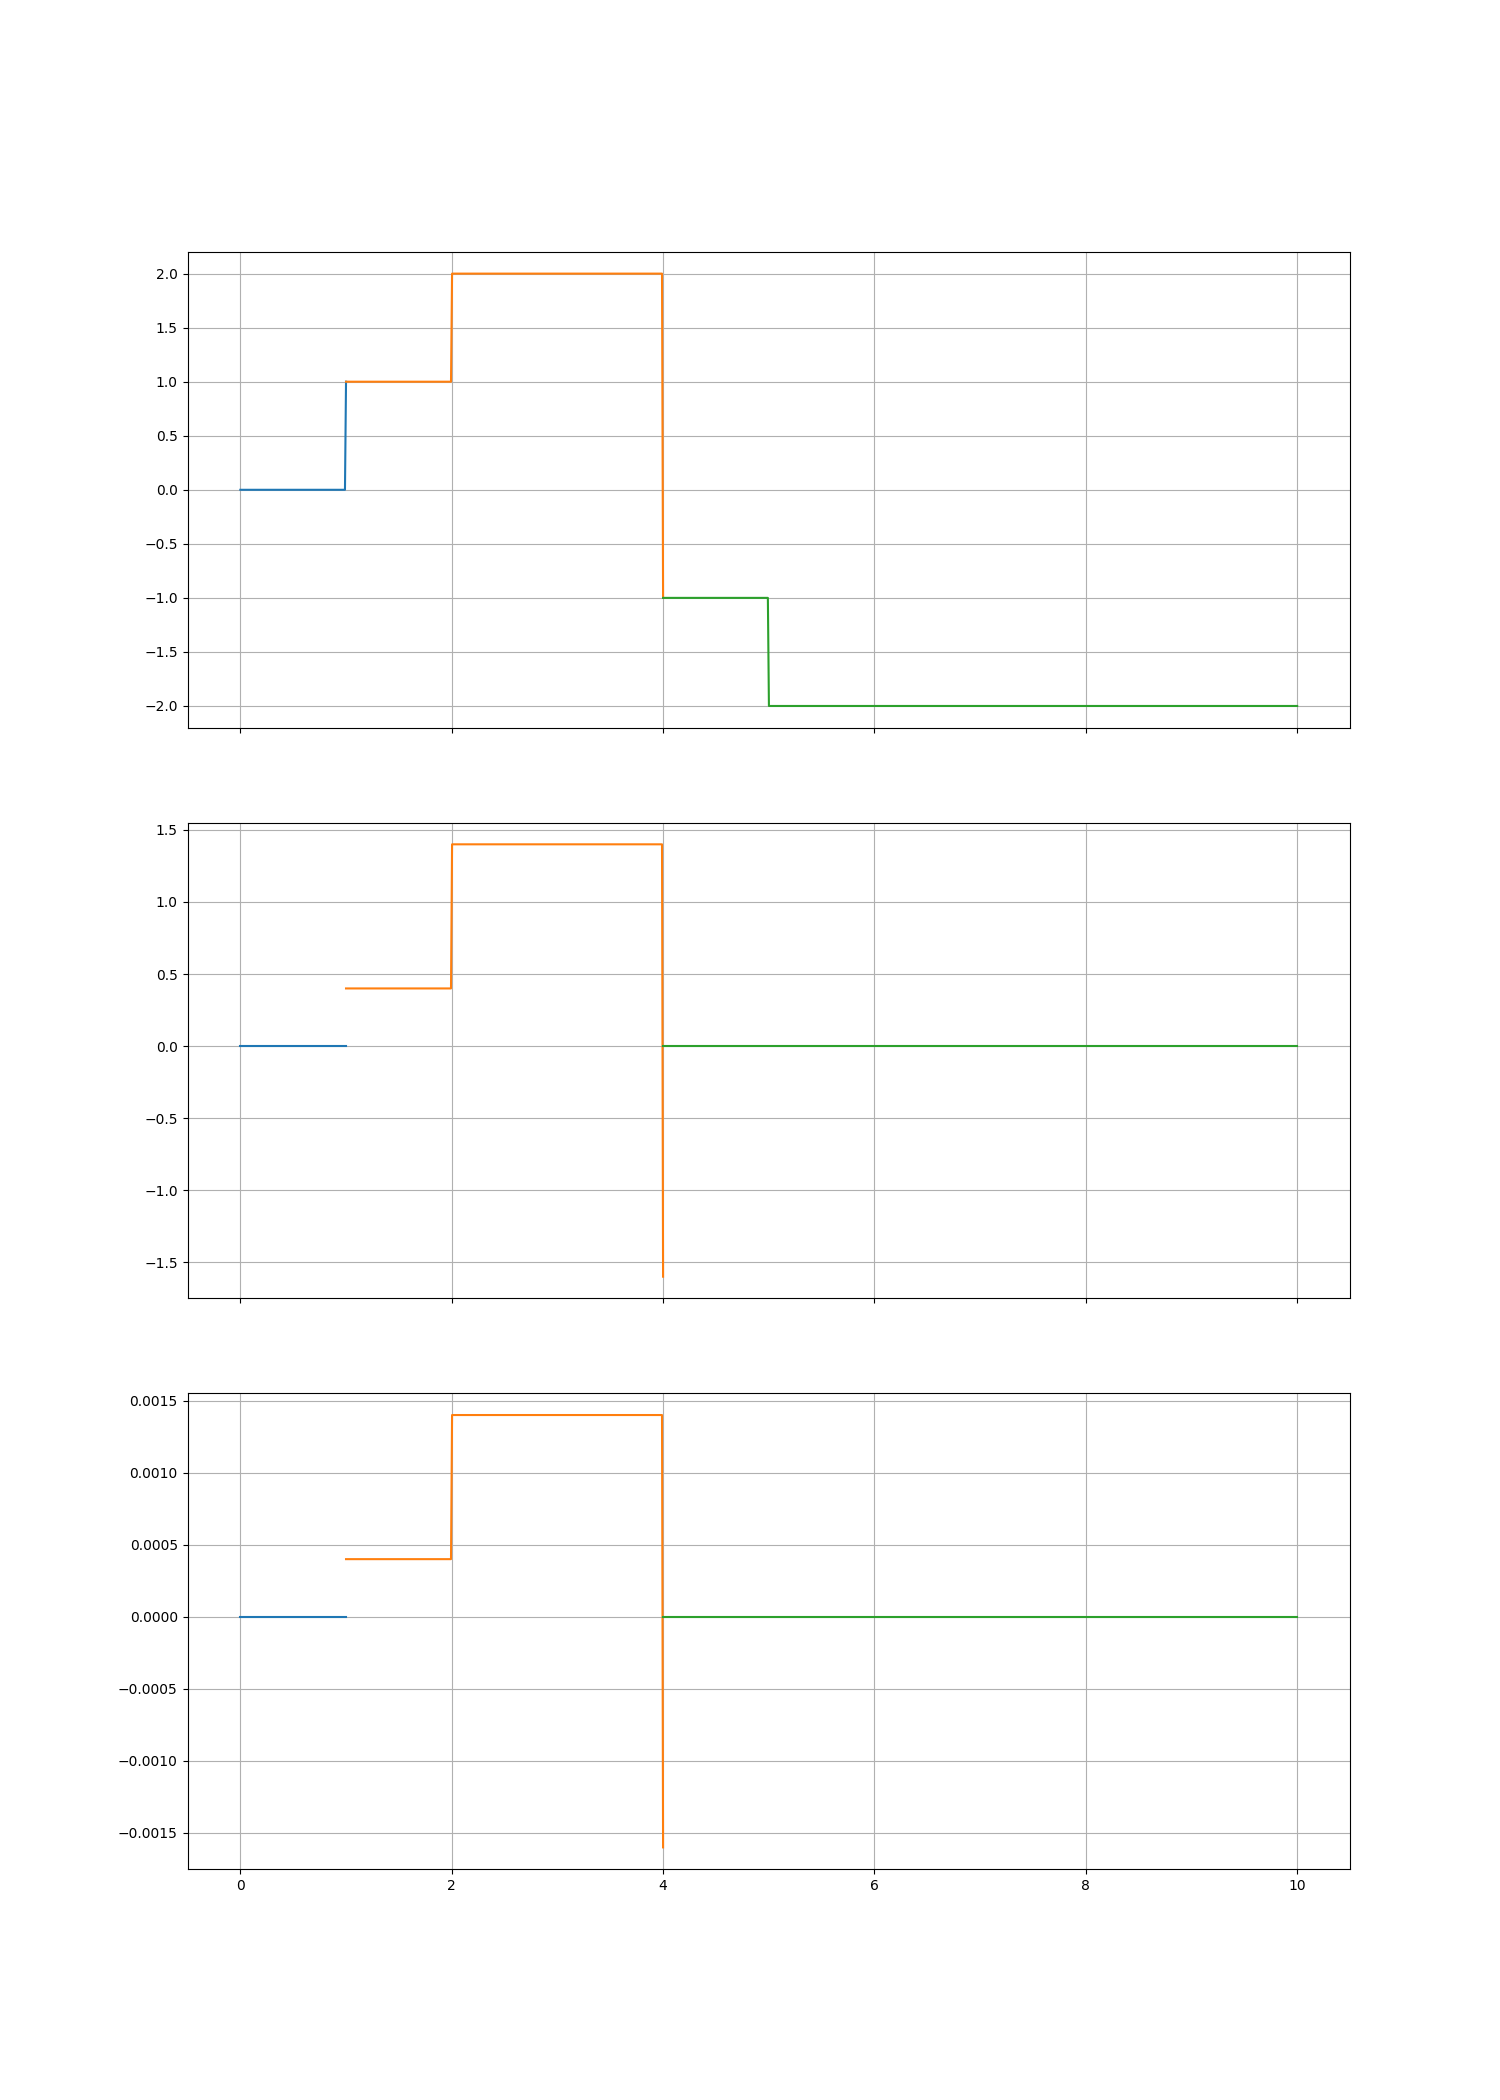

In [20]:
fig, axs = plt.subplots(3, figsize=[15, 21], sharex='all')

tmax = 10
tstep = 1e-2

plotTranMeasurments(model, 0, tmax, tstep, [(t0, Vin, "S(t)"),], axs[0])
plotTranMeasurments(model, 0, tmax, tstep, [(t0, Iin, "Vout(t)"),], axs[2])
plotTranMeasurments(model, 0, tmax, tstep, [(t0, Vout, "IL(t)"),], axs[1])

for ax in axs:
    ax.grid(True)
    #ax.legend(loc="best")

plt.show()